In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [103]:
# n_xticks = 6
n_yticks = 7

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

ax_left = 0.25
ax_right = 0.08
ax_bottom = 0.15
ax_top = 0.02
ax_width = 1 - ax_left - ax_right
ax_height = 1 - ax_bottom - ax_top

n_col = 3

path_plot = '../plots/index_currency.png'
plot_dpi = 300

In [66]:
df_currency = pd.read_excel('../data/valutakurser_d.xlsx', header = 6, index_col = 0)
df_currency.index.names = ['Date']

In [67]:
df_msci_world = pd.read_excel('../data/historyIndex.xls', header = 6, index_col = 0, skipfooter =18)
df_msci_world.rename(columns={'WORLD Standard (Large+Mid Cap) ':'MSCI_World'}, inplace=True)

In [68]:
icheck = lambda x, xlist: True if x in xlist else False

index_msci_world = [icheck(x, df_currency.index) for x in df_msci_world.index]
index_usd = [icheck(x, df_msci_world.index) for x in df_currency.index]

usd_dates = df_currency.loc[index_usd, '1 USD']
msci_world_dates = df_msci_world.loc[index_msci_world, 'MSCI_World']

df = pd.concat([usd_dates, msci_world_dates], axis=1)
df['MSCI_World_NOK'] = df['MSCI_World'] * df['1 USD']

In [69]:
t = df.index
msci_usd = df['MSCI_World'].values
msci_nok = df['MSCI_World_NOK'].values
usd_nok = df['1 USD'].values

In [100]:
index_usd_lim_min = 0
index_usd_lim_max = 3600

index_nok_lim_min = 0
index_nok_lim_max = 21000

usd_nok_min = 0
usd_nok_max = 15

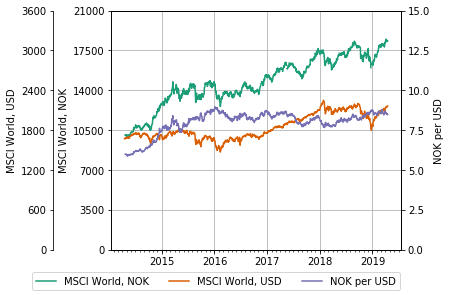

In [104]:
fig = plt.figure()
ax_msci_nok = fig.add_axes([ax_left, ax_bottom, ax_width, ax_height])

ax_msci_usd = ax_msci_nok.twinx()
ax_usd_nok = ax_msci_nok.twinx()
ax_msci_nok.grid()

ax_msci_usd.spines["left"].set_position(("axes", -0.2))
ax_msci_usd.yaxis.set_label_position('left')
ax_msci_usd.yaxis.set_ticks_position('left')

ax_msci_nok.xaxis.set_major_locator(years)
ax_msci_nok.xaxis.set_major_formatter(yearsFmt)
ax_msci_nok.xaxis.set_minor_locator(months)

ax_msci_usd.set_ylim([index_usd_lim_min, index_usd_lim_max])
ax_msci_usd.set_yticks(list(np.linspace(index_usd_lim_min, index_usd_lim_max, n_yticks)))

ax_msci_nok.set_ylim([index_nok_lim_min, index_nok_lim_max])
ax_msci_nok.set_yticks(list(np.linspace(index_nok_lim_min, index_nok_lim_max, n_yticks)))

ax_usd_nok.set_ylim([usd_nok_min, usd_nok_max])
ax_usd_nok.set_yticks(list(np.linspace(usd_nok_min, usd_nok_max, n_yticks)))

ax_msci_nok.plot(t, msci_nok, "#1b9e77", label = 'MSCI World, NOK')
ax_msci_usd.plot(t, msci_usd, "#d95f02", label = 'MSCI World, USD')
ax_usd_nok.plot(t, usd_nok, "#7570b3", label = 'NOK per USD')

ax_msci_nok.set_ylabel("MSCI World, NOK")
ax_msci_usd.set_ylabel("MSCI World, USD")
ax_usd_nok.set_ylabel("NOK per USD")

fig.legend(loc='lower center', bbox_to_anchor=(0.5, 0.0), ncol = n_col)

fig.savefig(path_plot, dpi = plot_dpi)